In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

In [17]:
X,y = make_regression(n_samples=500, n_features = 1, bias = 4.2, noise = 12)

In [18]:
print(X.shape)
print(y.shape)

(500, 1)
(500,)


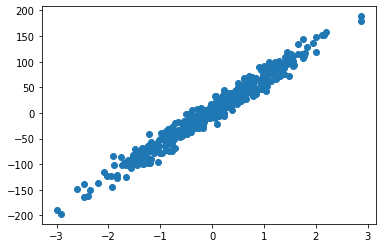

In [19]:
plt.scatter(X, y)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75)

In [27]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(375, 1) (375,)
(125, 1) (125,)


In [32]:
def hypothesis(x, W):
    x0 = 1
    x1 = x
    h = W[0]*x0 + W[1]*x1
    return h

In [41]:
def error(X, W, y):
    err = 0.0
    m = X.shape[0]
    for i in range(m):
        h = hypothesis(X[i], W)
        err += (h - y[i])**2
    err /= 2*m
    return err

In [42]:
def gradient_descent(X, W, y, learning_rate = 0.1):
    m = X.shape[0]
    grad0 = 0.0
    grad1 = 0.0
    for i in range(m):
        grad1 += (y[i] - hypothesis(X[i], W))*X[i]
        grad0 += (y[i] - hypothesis(X[i], W))
    
    grad1 /= m
    grad0 /= m
    W[1] += learning_rate*grad1
    W[0] += learning_rate*grad0
    err = error(X, W, y)
    return W, err

In [43]:
W = np.array([0.5 ,2])
error_list = []
for i in range(400):
    W, err = gradient_descent(xtrain, W, ytrain)
    error_list.append(err)
print(W)

[ 4.45160776 64.23341856]


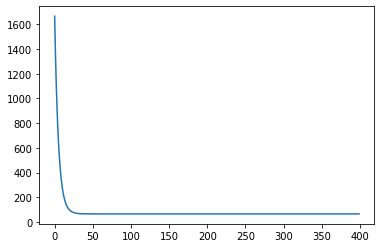

In [44]:
plt.plot(error_list)
plt.show()

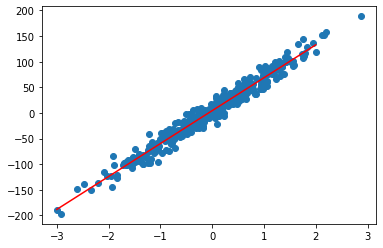

In [46]:
plt.scatter(xtrain, ytrain)

X = np.arange(-3, 3)
Y = W[0] + W[1]*X
plt.plot(X, Y , c='r')
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(xtrain, ytrain)

LinearRegression()